# EDA

## Load and Inspect data

In [2]:
import sys
import os


sys.path.append(os.path.abspath("../scripts"))
from load_csv import load_csv

file_path = "../data/raw_analyst_ratings.csv"
df = load_csv(file_path)

df.head()

2025-05-30 16:32:02,364 - INFO - Successfully loaded data from ../data/raw_analyst_ratings.csv with shape (1407328, 6)


,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1407328 entries, 0 to 1407327
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   Unnamed: 0  1407328 non-null  int64 
 1   headline    1407328 non-null  object
 2   url         1407328 non-null  object
 3   publisher   1407328 non-null  object
 4   date        1407328 non-null  object
 5   stock       1407328 non-null  object
dtypes: int64(1), object(5)
memory usage: 64.4+ MB


## Descriptive statistics

### Headline Length Distribution

In [4]:
# Use utility function from eda_utils to analyze headline lengths
from eda_utils.headline_stats import analyze_headline_lengths

stats = analyze_headline_lengths(df=df, column="headline")
stats

2025-05-30 16:32:02,858 - INFO - Starting headline length analysis on column 'headline'.
2025-05-30 16:32:03,371 - INFO - Headline length analysis complete.


{'count': np.int64(1407328),
 'mean': np.float64(73.12051490484095),
 'std': np.float64(40.73530993195065),
 'min': np.int64(3),
 'max': np.int64(512),
 'quantiles': {0.25: 47.0, 0.5: 64.0, 0.75: 87.0}}

2025-05-30 16:32:04,243 - INFO - PlotGenerator initialized.
2025-05-30 16:32:10,690 - INFO - Displaying histogram for column 'headline_length'


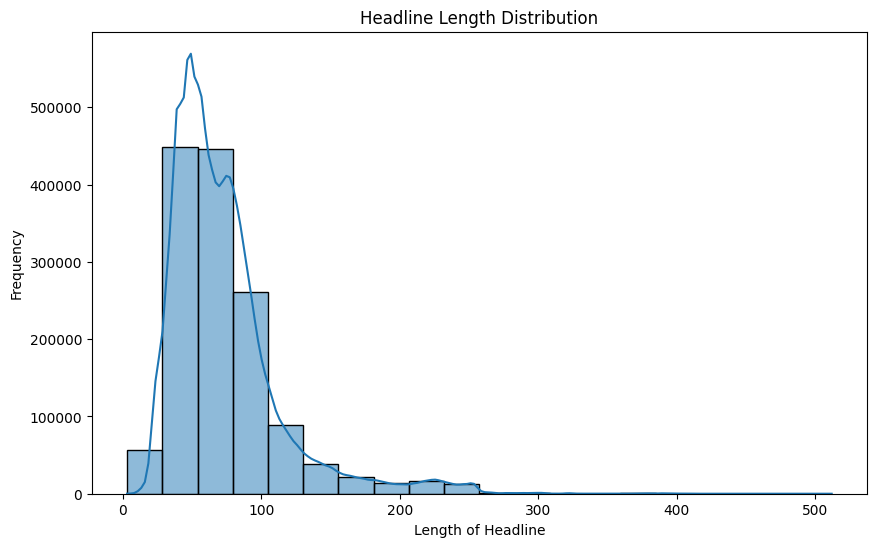

In [5]:
# Histogram of headline lengths
from plot_generator import PlotGenerator

plotter = PlotGenerator()
plotter.plot_histogram(df=df, column="headline_length", title="Headline Length Distribution", xlabel="Length of Headline", ylabel="Frequency")

#### Note

- The histogram reveals the length of news headlines is right-skewed and most headlines have a length between 25-75 characters, indicating that while a majority of headlines are relatively short, there is a long tail of headlines that are significantly longer. This implies that most news sources tend to use concise headlines, but longer, more descriptive headlines occur less frequently.

In [6]:
# Identify outliers in headline lengths
from eda_utils.identify_text_outliers import TextOutlierDetector

outlier_detector = TextOutlierDetector()
outliers = outlier_detector.detect_length_outliers(df=df, column="headline_length")
outliers.count()

2025-05-30 16:32:10,842 - INFO - TextOutlierDetector initialized.
2025-05-30 16:32:11,057 - INFO - Detected 36715 outliers in 'headline_length' using Z-score threshold 3.0


Unnamed: 0         36715
headline           36715
url                36715
publisher          36715
date               36715
stock              36715
headline_length    36715
z_score            36715
dtype: int64

In [7]:
outliers.head(10)

,Unnamed: 0,headline,url,publisher,date,stock,headline_length,z_score
21,21,Shares of several healthcare companies are tra...,https://www.benzinga.com/20/05/15935673/shares...,Benzinga Newsdesk,2020-05-01 00:00:00,A,210,3.360218
26,26,Shares of several companies in the auto dealer...,https://www.benzinga.com/wiim/20/04/15769071/s...,Benzinga Newsdesk,2020-04-08 00:00:00,A,254,4.440363
27,27,Shares of several healthcare companies are tra...,https://www.benzinga.com/wiim/20/04/15748126/s...,Benzinga Newsdesk,2020-04-06 00:00:00,A,212,3.409316
33,33,Shares of several healthcare companies are tra...,https://www.benzinga.com/wiim/20/03/15683827/s...,Benzinga Newsdesk,2020-03-27 00:00:00,A,212,3.409316
39,39,Shares of several healthcare companies are tra...,https://www.benzinga.com/wiim/20/03/15558425/s...,Benzinga Newsdesk,2020-03-16 00:00:00,A,209,3.335670
40,40,Shares of several basic materials companies ar...,https://www.benzinga.com/wiim/20/03/15546085/s...,Benzinga Newsdesk,2020-03-13 00:00:00,A,251,4.366716
42,42,Shares of several coronavirus-related companie...,https://www.benzinga.com/wiim/20/03/15528213/s...,luke@benzinga.com,2020-03-11 00:00:00,A,206,3.262023
43,43,"Agilent Technologies Inc Says In January 2020,...",https://www.benzinga.com/news/20/03/15472189/a...,luke@benzinga.com,2020-03-03 00:00:00,A,255,4.464911
94,94,Shares of several healthcare companies are tra...,https://www.benzinga.com/markets/wiim/19/10/14...,Benzinga Newsdesk,2019-10-11 00:00:00,A,295,5.446861
96,96,Shares of several healthcare companies are tra...,https://www.benzinga.com/markets/wiim/19/10/14...,Benzinga Newsdesk,2019-10-08 00:00:00,A,251,4.366716


#### Note

- All the first 10 outlier columns show the same publisher, 8 of them the same name and 2 of them an email same as the publsiher name which indicates they could be the same. next step should be to group these outliers by publisher and see if they have the same publisher.

In [8]:
outliers_publisher_stats = outliers.groupby('publisher').agg(
    total_articles=('headline', 'count'),
    avg_length=('headline_length', 'mean'),
)
outliers_publisher_stats = outliers_publisher_stats.sort_values(by='total_articles', ascending=False)
outliers_publisher_stats.head(10)

,total_articles,avg_length
publisher,,
Benzinga Newsdesk,23169,233.310587
Paul Quintaro,3278,217.326724
Benzinga_Newsdesk,2782,229.037743
Benzinga Newsdesk,2277,265.164251
Hal Lindon,1925,224.767273
luke@benzinga.com,1036,233.445946
Eddie Staley,710,224.661972
Charles Gross,583,227.109777
Brad Hammond,484,227.460744


In [9]:
outliers_publisher_stats.count()

total_articles    32
avg_length        32
dtype: int64

#### Note

- The grouped data shows that most outlier headlines come from certain number of publishers which indicates these publishers tend to publish a descriptive/long and/or short/precise headlines.

In [10]:
# detect duplicate headlines
duplicate_headlines = outlier_detector.detect_duplicate_texts(df=df, column="headline")
duplicate_headlines.count()

2025-05-30 16:32:11,911 - INFO - Detected 690564 duplicate rows based on column 'headline'


Unnamed: 0         690564
headline           690564
url                690564
publisher          690564
date               690564
stock              690564
headline_length    690564
dtype: int64

In [11]:
duplicate_headlines.head(10)

,Unnamed: 0,headline,url,publisher,date,stock,headline_length
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A,39
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A,42
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A,29
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A,44
6,6,"UBS Maintains Neutral on Agilent Technologies,...",https://www.benzinga.com/news/20/05/16094027/u...,vishwanath@benzinga.com,2020-05-22 09:36:20-04:00,A,73
7,7,Agilent Technologies shares are trading higher...,https://www.benzinga.com/wiim/20/05/16093805/a...,Benzinga Newsdesk,2020-05-22 09:07:04-04:00,A,120
9,9,10 Biggest Price Target Changes For Friday,https://www.benzinga.com/analyst-ratings/price...,Lisa Levin,2020-05-22 08:06:17-04:00,A,42
10,10,30 Stocks Moving in Friday's Pre-Market Session,https://www.benzinga.com/news/20/05/16092879/3...,Lisa Levin,2020-05-22 00:00:00,A,47
12,12,8 Stocks Moving In Thursday's After-Hours Session,https://www.benzinga.com/news/20/05/16089803/8...,Tyree Gorges,2020-05-21 00:00:00,A,49
13,13,Agilent Technologies shares are trading higher...,https://www.benzinga.com/wiim/20/05/16089218/a...,Benzinga Newsdesk,2020-05-21 00:00:00,A,120


In [12]:
# Flag outliers and duplicates in the original DataFrame
from eda_utils.data_flagger import DataFlagger

flagger = DataFlagger()
flagged_df = flagger.flag_rows(df, outliers.index, 'is_outlier')
flagged_df = flagger.flag_rows(df, duplicate_headlines.index, 'is_duplicate')
flagged_df.head()

2025-05-30 16:32:12,206 - INFO - DataFlagger initialized.
2025-05-30 16:32:12,210 - INFO - Flagged 36715 rows in column 'is_outlier'.
2025-05-30 16:32:12,251 - INFO - Flagged 690564 rows in column 'is_duplicate'.


,Unnamed: 0,headline,url,publisher,date,stock,headline_length,is_outlier,is_duplicate
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A,39,False,True
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A,42,False,True
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A,29,False,True
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A,44,False,True
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A,87,False,False


### Most Active Publishers

In [13]:
# Use PublisherAnalyzer utility class to see most active publishers
from eda_utils.publisher_analysis import PublisherAnalyzer

publisher_analyzer = PublisherAnalyzer()
article_by_publisher_count = publisher_analyzer.count_articles_by_publisher(df=flagged_df, publisher_col="publisher")
article_by_publisher_count.head()

2025-05-30 16:32:12,274 - INFO - PublisherStatsGenerator initialized.
2025-05-30 16:32:12,391 - INFO - Counted 1034 unique publishers.


,publisher,article_count
0,Paul Quintaro,228373
1,Lisa Levin,186979
2,Benzinga Newsdesk,150484
3,Charles Gross,96732
4,Monica Gerson,82380


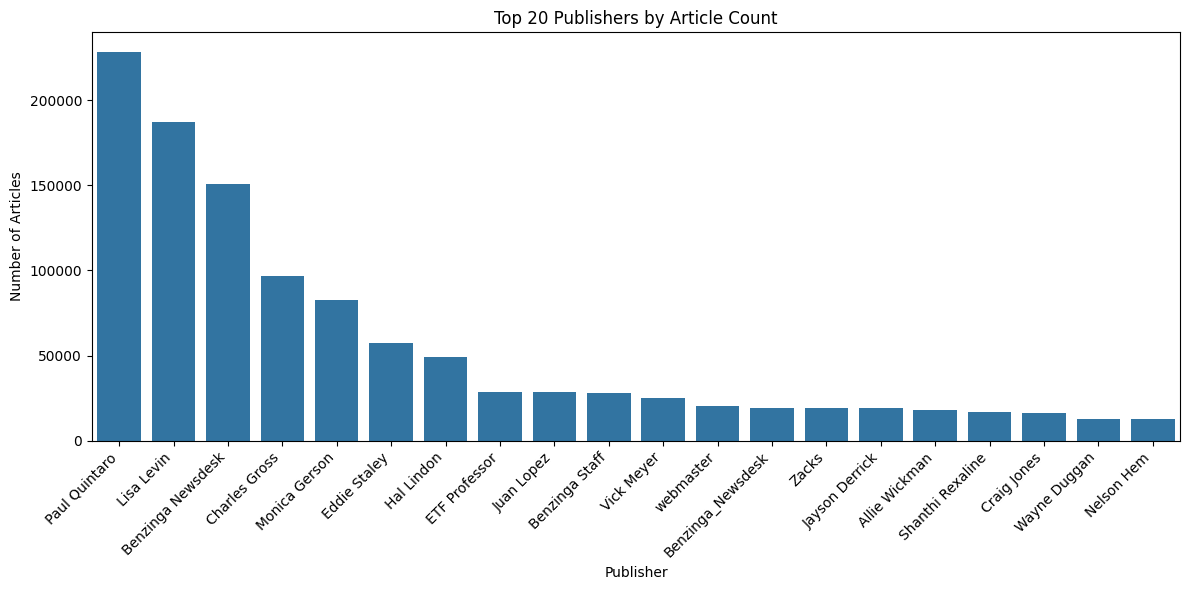

2025-05-30 16:32:12,806 - INFO - Plotted ranked bar chart for top 20 items by article_count


In [14]:
# use plot generator to visualize the most active publishers using a ranked bar chart
plotter.plot_ranked_bar_chart(
    df=article_by_publisher_count,
    x_col="publisher",
    y_col="article_count",
    title="Top 20 Publishers by Article Count",
    xlabel="Publisher",
    ylabel="Number of Articles",
    top_n=20
)

### Trends in News Publication

In [15]:
# Use TimeSeriesTrendsAnalyzer to analyze trends over time
from eda_utils.time_series_trends import TimeSeriesTrendsAnalyzer
time_series_analyzer = TimeSeriesTrendsAnalyzer()
daily_trends_df = time_series_analyzer.get_publication_counts_per_day(df=flagged_df, date_column="date")
daily_trends_df.head()

2025-05-30 16:32:12,820 - INFO - TimeSeriesTrendsAnalyzer initialized.
2025-05-30 16:32:13,581 - INFO - Aggregated publication counts using frequency 'D' with 3334 rows.


,date,article_count
0,2011-04-27 00:00:00-04:00,1
1,2011-04-28 00:00:00-04:00,2
2,2011-04-29 00:00:00-04:00,2
3,2011-04-30 00:00:00-04:00,1
4,2011-05-01 00:00:00-04:00,1


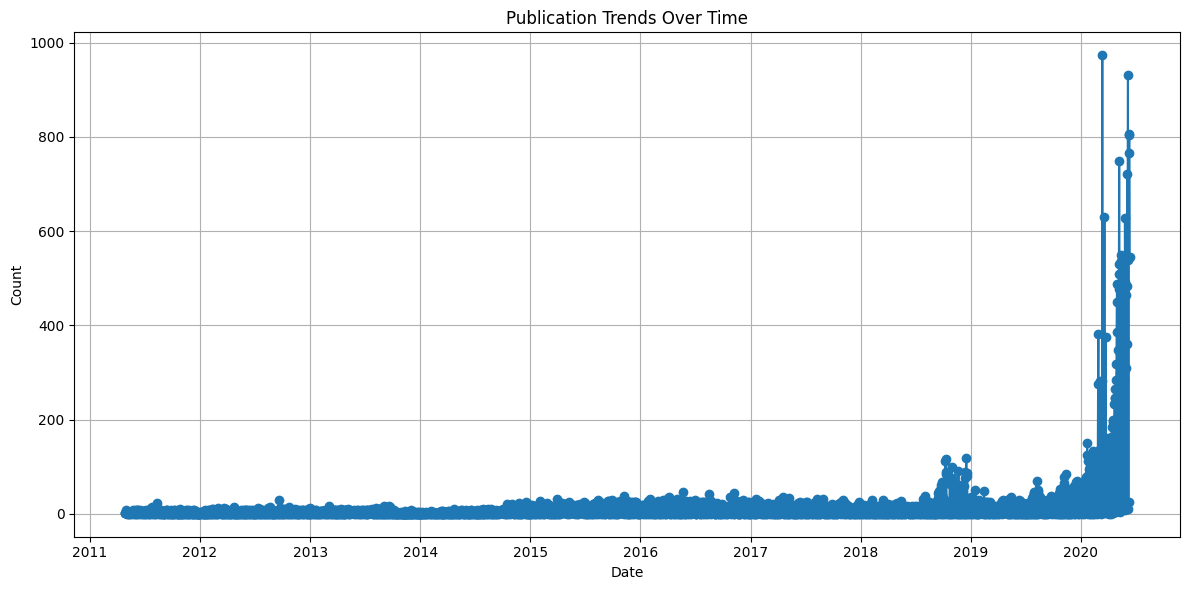

2025-05-30 16:32:13,837 - INFO - Time series plot generated for 'article_count' over 'date'


In [16]:
# Use PlotGenerator to visualize trends over time
plotter.plot_time_series(
    df=daily_trends_df,
    date_column="date",
    value_column="article_count",
    title="Publication Trends Over Time",
)

In [17]:
# Analyze hourly trends in publication counts
hourly_trends_df = time_series_analyzer.get_publication_counts_per_hour(df=flagged_df, date_col="date")
hourly_trends_df.head()

2025-05-30 16:32:14,582 - INFO - Generated hourly publication frequency with 24 entries.


,hour,count
0,0.0,67
1,1.0,14
2,2.0,57
3,3.0,93
4,4.0,1469


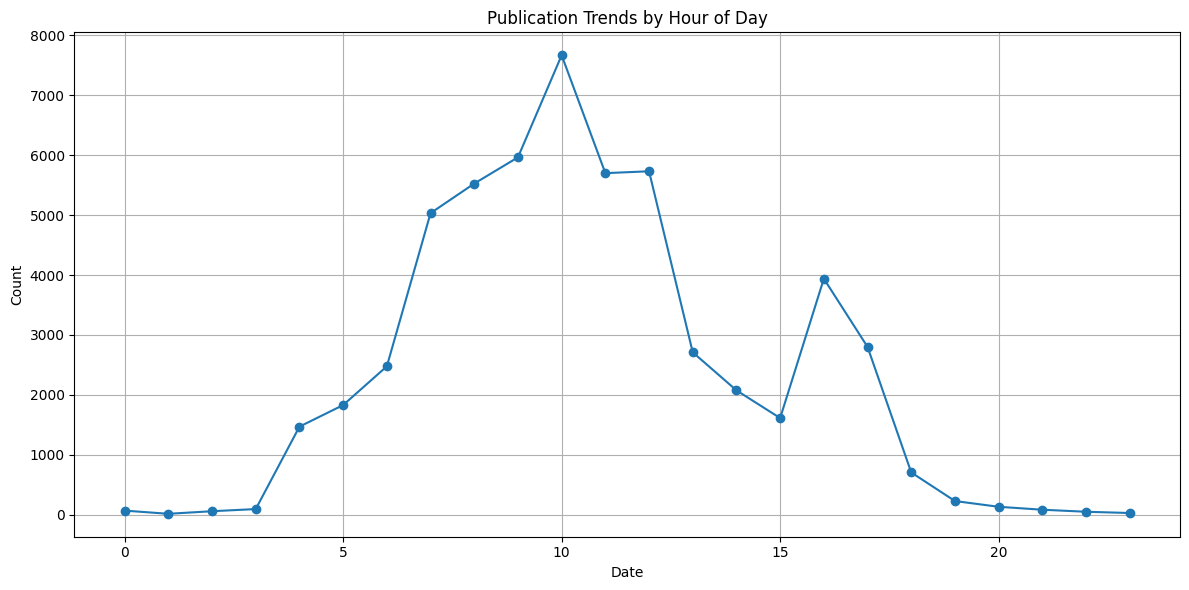

2025-05-30 16:32:14,812 - INFO - Time series plot generated for 'count' over 'hour'


In [18]:
# Use plot generator to visualize hourly trends
plotter.plot_time_series(
    df=hourly_trends_df,
    date_column="hour",
    value_column="count",
    title="Publication Trends by Hour of Day",
)

### Publisher Email/Domain Analysis

In [19]:
# use extract publisher emails to extract rows with publisher email/domain
from eda_utils.extract_publisher_emails import PublisherEmailExtractor

email_extractor = PublisherEmailExtractor()
publisher_emails_df = email_extractor.extract_publisher_emails(df=flagged_df, column="publisher")
publisher_emails_df.head()

2025-05-30 16:32:14,824 - INFO - PublisherEmailExtractor initialized.
2025-05-30 16:32:16,177 - INFO - Extracted 18 unique publisher email addresses.


,publisher_email,count
0,luke@benzinga.com,5198
1,vishwanath@benzinga.com,1830
2,bret.kenwell@benzinga.com,896
3,vivek.proactive@gmail.com,120
4,richa28dhand@gmail.com,17


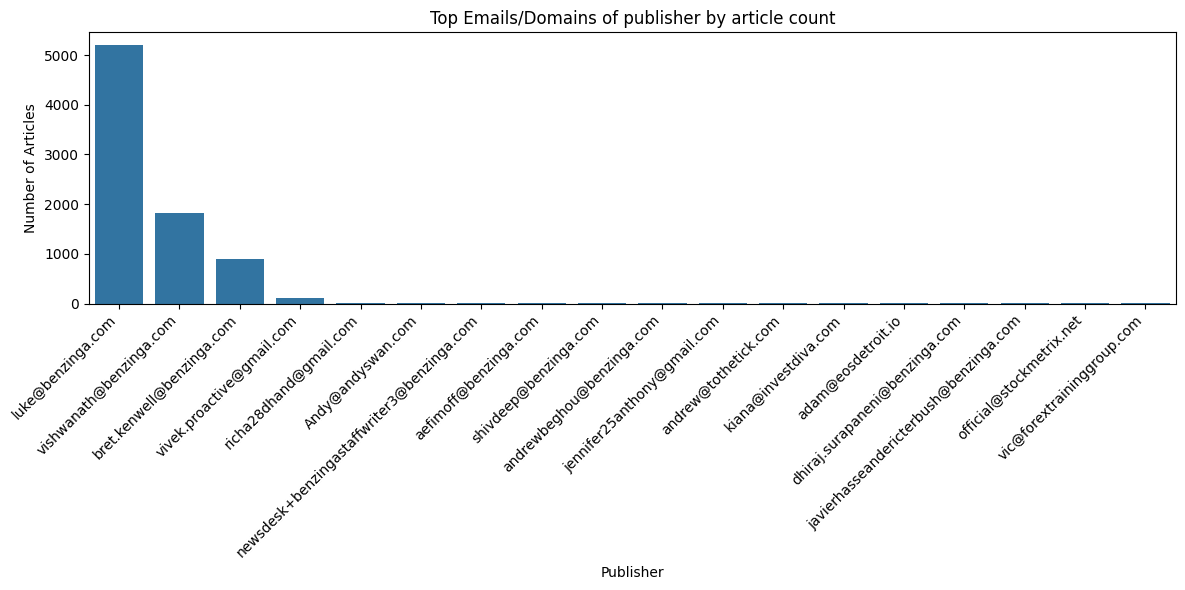

2025-05-30 16:32:16,593 - INFO - Plotted ranked bar chart for top 20 items by count


In [20]:
# Use plot generator to visualize the rank of publishers emails
plotter.plot_ranked_bar_chart(
    df=publisher_emails_df,
    x_col="publisher_email",
    y_col="count",
    title="Top Emails/Domains of publisher by article count",
    xlabel="Publisher",
    ylabel="Number of Articles",
)

### Save flagged dataframe

In [21]:
flagged_df.to_csv("../data/flagged_raw_analyst_ratings.csv", index=False)